In [1]:
import tensorflow as tf

print("tensorflow version:",tf.__version__)

tensorflow version: 1.12.0


In [2]:
# load dataset

from modules.mnist import MNIST
data = MNIST(data_dir="data/MNIST")

print("Size of:")
print("    -Training-set:\t\t{}".format(data.num_train))
print("    -Validation-set:\t\t{}".format(data.num_val))
print("    -Test-set:\t\t\t{}".format(data.num_test))

# mnist images width and height: 28
img_size = data.img_size
# mnist data input (image shape: 28 * 28 = 784)
img_shape = data.img_shape
img_size_flat = data.img_size_flat
# mnist gray scale images with 1 channel
num_channels = data.num_channels
# mnist total classes(0-9 digits)
num_classes = data.num_classes


print("\ndata set information:")
print("    -img_size:\t\t\t", img_size)
print("    -img_shape:\t\t\t", img_shape)
print("    -num_channels:\t\t", num_channels)
print("    -img_size_flat:\t\t", img_size_flat)
print("    -num_classes:\t\t", num_classes)

Size of:
    -Training-set:		55000
    -Validation-set:		5000
    -Test-set:			10000

data set information:
    -img_size:			 28
    -img_shape:			 (28, 28)
    -num_channels:		 1
    -img_size_flat:		 784
    -num_classes:		 10


In [3]:
# Training Parameters
learning_rate_1 = 1e-3
display_step = 20

train_batch_size_1 = 64
train_batch_size_2 = 128

# Dropout probability to keep units
dropout_prob_1 = 0.75

# L2 正则项系数
BETA = 0.01

In [4]:
# network parameters

# convolutional layer 1
size_conv_kernel_1 = 5
num_conv_kernel_1 = 16

# convolutional layer 2
size_conv_kernel_2 = 5
num_conv_kernel_2 = 36

# fully connected layer 1
# we do the pooling operations 2 times
num_pooling = 2
# fully connected layer, 7*7*36=1764 input size
size_input_fc_1 = int((img_size/(2*num_pooling))*(img_size/(2*num_pooling))*(num_conv_kernel_2))
# size of fc layer 1
size_fc_1 = 128

# fully connected layer 2 as output layer
size_output = num_classes


Layer definiton

In [5]:
shape_dict = {
    #shape of weights
    
    # 5*5 conv, 1 input channel, 16 output channel.
    's_weights_conv_1':[size_conv_kernel_1, size_conv_kernel_1, num_channels, num_conv_kernel_1],
    # 5*5 conv, 16 input channel, 36 output channel.
    's_weights_conv_2':[size_conv_kernel_2, size_conv_kernel_2, num_conv_kernel_1, num_conv_kernel_2],
    # faltten layer, convolutional layer output 4D tensors. 
    # we now wish to use these as input in a fully connected network, 
    # which requires for the tensors to be reshaped or flattened to 2D tensors.
    # fully connected layer, 7*7*36=1764 inputs, 128 outputs
    's_weights_fc_1':[size_input_fc_1, size_fc_1],
    # fully connected layer, 128 inputs, 10 outputs(class prediction)
    's_weights_output_layer':[size_fc_1, num_classes],
    
    # shape of biases
    
    's_biases_conv_1':[num_conv_kernel_1],
    's_biases_conv_2':[num_conv_kernel_2],
    's_biases_fc_1':[size_fc_1],
    's_biases_output_layer':[size_output]
}

weights_dict = {
    
    # we add the name atrribute for tf.name_scope(). you find it in cnn_modules.py
    'w_conv_1': tf.Variable(tf.truncated_normal(shape_dict['s_weights_conv_1'], stddev=0.05), 
                            name="w_conv_1"),
    # 'w_conv_1': tf.Variable(tf.random_normal(shape_dict['s_weights_conv_1']))
    # 'w_conv_1': tf.Variable(tf.zeros(shape_dict['s_weights_conv_1'])
    
    'w_conv_2': tf.Variable(tf.truncated_normal(shape_dict['s_weights_conv_2'], stddev=0.05), 
                            name="w_conv_2"),
    # 'w_conv_2': tf.Variable(tf.random_normal(shape_dict['s_weights_conv_2'])),
    
    'w_fc_1': tf.Variable(tf.truncated_normal(shape_dict['s_weights_fc_1'], stddev=0.05), 
                          name="w_fc_1"),
    # 'w_fc_1': tf.Variable(tf.random_normal(shape_dict['s_weights_fc_1'])),
    
    'w_output_layer': tf.Variable(tf.truncated_normal(shape_dict['s_weights_output_layer'], stddev=0.05), 
                                  name="w_output_layer")
    # 'w_output_layer': tf.Variable(tf.random_normal(shape_dict['s_weights_output_layer']))
}

biases_dict = {
    # 'b_conv_1': tf.Variable(tf.random_normal(shape_dict['s_biases_conv_1'])),
    'b_conv_1': tf.Variable(tf.constant(0.05, shape=shape_dict['s_biases_conv_1']),
                            name="b_conv_1"),
    
    # 'b_conv_2': tf.Variable(tf.random_normal(shape_dict['s_biases_conv_2'])),
    'b_conv_2': tf.Variable(tf.constant(0.05, shape=shape_dict['s_biases_conv_2']),
                            name="b_conv_2"),
    
    # 'b_fc_1': tf.Variable(tf.random_normal(shape_dict['s_biases_fc_1'])),
    'b_fc_1': tf.Variable(tf.constant(0.05, shape=shape_dict['s_biases_fc_1']),
                          name="b_fc_1"),
    
    # 'b_output_layer': tf.Variable(tf.random_normal(shape_dict['s_biases_output_layer']))
    'b_output_layer': tf.Variable(tf.constant(0.05, shape=shape_dict['s_biases_output_layer']),
                                  name="b_output_layer")
}

#print("weights shape of conv1 layer:']:", shape_dict['s_weights_conv_1'])
#print("biases shape of conv1 layer:", shape_dict['s_biases_conv_1'])
print("w_conv_1:", weights_dict['w_conv_1'])
print("w_conv_2:", weights_dict['w_conv_2'])
print("w_fc_1:", weights_dict['w_fc_1'])
print("w_output_layer:", weights_dict['w_output_layer'])
print("b_conv_1:", biases_dict['b_conv_1'])
print("b_conv_2:", biases_dict['b_conv_2'])
print("b_fc_1:", biases_dict['b_fc_1'])
print("b_output_layer:", biases_dict['b_output_layer'])

w_conv_1: <tf.Variable 'w_conv_1:0' shape=(5, 5, 1, 16) dtype=float32_ref>
w_conv_2: <tf.Variable 'w_conv_2:0' shape=(5, 5, 16, 36) dtype=float32_ref>
w_fc_1: <tf.Variable 'w_fc_1:0' shape=(1764, 128) dtype=float32_ref>
w_output_layer: <tf.Variable 'w_output_layer:0' shape=(128, 10) dtype=float32_ref>
b_conv_1: <tf.Variable 'b_conv_1:0' shape=(16,) dtype=float32_ref>
b_conv_2: <tf.Variable 'b_conv_2:0' shape=(36,) dtype=float32_ref>
b_fc_1: <tf.Variable 'b_fc_1:0' shape=(128,) dtype=float32_ref>
b_output_layer: <tf.Variable 'b_output_layer:0' shape=(10,) dtype=float32_ref>


In [6]:
from modules.cnn_modules import new_conv_layer
from modules.cnn_modules import flatten_layer
from modules.cnn_modules import new_fc_layer
from modules.cnn_modules import new_dropout_layer

def conv_net(input, weights, biases, dropout_prob):
    
    # convolutional layer 1
    # name="layer_conv_1" means that we use it as the name node in tensorboard.
    layer_conv_1 = \
        new_conv_layer(input=x_image,
                       layer_name="layer_conv_1",
                       weights=weights_dict['w_conv_1'],
                       biases=biases_dict['b_conv_1'],
                       use_pooling=True)
    print("layer_conv_1:", layer_conv_1)
    
    # convolutional layer 2
    layer_conv_2 = \
        new_conv_layer(input=layer_conv_1,
                       layer_name="layer_conv_2",
                       weights=weights_dict['w_conv_2'],
                       biases=biases_dict['b_conv_2'],
                       use_pooling=True)
    print("layer_conv_2:", layer_conv_2)
    
    # flatten layer
    layer_flat = flatten_layer(layer_conv_2, layer_name="flatten_layer")
    print("layer_flat:",layer_flat)
    
    # fully-connected layer 1
    layer_fc_1 = new_fc_layer(input=layer_flat,
                              layer_name="layer_fc_1",
                              weights=weights_dict['w_fc_1'],
                              biases=biases_dict['b_fc_1'],
                              use_relu=True)
    print("layer_fc_1:", layer_fc_1)

    # fully-connected layer 2, output layer. relu is used,
    # so we can learn non-linear relations
    #layer_fc_2 = new_fc_layer(input=layer_fc_1,
    #                          layer_name="layer_fc_2",
    #                          weights=weights_dict['w_output_layer'],
    #                          biases=biases_dict['b_output_layer'],
    #                          use_relu=False)
    #print("layer_fc2:", layer_fc_2)
        
    # apply dropout layer as output layer
    layer_dropout = new_dropout_layer(input=layer_fc_1,
                                      layer_name="layer_dropout",
                                      weights=weights_dict['w_output_layer'],
                                      biases=biases_dict['b_output_layer'],
                                      dropout=dropout_prob)
    print("layer_dropout:", layer_dropout)
    
    layer_output = layer_dropout

    return layer_output

Feed-word Setup

In [7]:
# Setup placeholders, add name nodes for tensorboard
# placeholder作为输入节点， Variable作为参数节点， Conv2d作为运算节点
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x_input_data')    
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_label_data')
# prediction result
y_true_cls = tf.argmax(y_true, axis=1)
# dropout (keep probability)
keep_prob = tf.placeholder(tf.float32)

print("x:", x)
# one-hot code output
print("y_true:", y_true)
print("y_true_cls:", y_true_cls)
print("dropout probability:", keep_prob)

x: Tensor("x_input_data:0", shape=(?, 784), dtype=float32)
y_true: Tensor("y_label_data:0", shape=(?, 10), dtype=float32)
y_true_cls: Tensor("ArgMax:0", shape=(?,), dtype=int64)
dropout probability: Tensor("Placeholder:0", dtype=float32)


In [8]:
# softmax layer
# mnist data input is a 1D vector with length 784(28 * 28 pixels)
# reshape to match picture format [height * width * channel]
# tensor input become 4D: [batch_size, height, width, channel]
# -1 means: num_images/batch_size will be calculate automatically    
# reshpe the data
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
print("x_image:", x_image)
# collect some summaries for tensorboard
tf.summary.image('input_images', x_image, 9)

# create the network
output_layer = conv_net(input=x_image, 
                        weights=weights_dict, 
                        biases=biases_dict, 
                        dropout_prob=dropout_prob_1)

print("output_layer:", output_layer)

with tf.name_scope("softmax"):
    # CNN_model
    y_pred = tf.nn.softmax(output_layer)    
print("y_pred:", y_pred)

y_pred_cls = tf.argmax(y_pred, axis=1)
print("y_pred_cls:", y_pred_cls)

x_image: Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
layer_conv_1: Tensor("layer_conv_1/relu:0", shape=(?, 14, 14, 16), dtype=float32)
layer_conv_2: Tensor("layer_conv_2/relu:0", shape=(?, 7, 7, 36), dtype=float32)
layer_flat: Tensor("flatten_layer/flatten:0", shape=(?, 1764), dtype=float32)
layer_fc_1: Tensor("layer_fc_1/relu:0", shape=(?, 128), dtype=float32)
layer_dropout: Tensor("layer_dropout/w_plus_b:0", shape=(?, 10), dtype=float32)
output_layer: Tensor("layer_dropout/w_plus_b:0", shape=(?, 10), dtype=float32)
y_pred: Tensor("softmax/Softmax:0", shape=(?, 10), dtype=float32)
y_pred_cls: Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


Loss & Traing

In [9]:
# Compute cross entropy as our loss function
# cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer,
#                                                           labels=y_true)
# print("cross_entropy:", cross_entropy)
# cross_entropy: Tensor("softmax_cross_entropy_with_logits/Reshape_2:0", shape=(?,), dtype=float32)

# 模型参数，包括 weight 和 bias
#trainable_vars = tf.trainable_variables()

# add name scope for tensorboard
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=y_true))
    # L2正则化效果不好，accuracy~=97.0%
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=y_true))+\
    #    BETA * tf.add_n([tf.nn.l2_loss(v)
    #                     for v in trainable_vars if not 'b' in v.name])
    
    # create a summary to monitor cost tensor on tensorboard
    tf.summary.scalar('cross_entropy', cost)

print("cost:", cost)

cost: Tensor("cost/Mean:0", shape=(), dtype=float32)


In [10]:
# add name scope for tensorboard
# use an AdamOptimizer to train the network
with tf.name_scope("optimizer_adam"):
    # optimization algorithm
    optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate_1).minimize(cost)
    # Gradiebt Descent
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate_1)
    # Op to calculate every variable gradient
    #grads = tf.gradients(cost, tf.trainable_variable())
    #grads = list(zip(grads, tf.trainable_variable()))
    # Op to update all variables according to their gradients
    #apply_grads = optimizer.apply_gradients(grads_and_vars=grads)
    
# optimizer_gradientDescent = tf.train.GradientDescentOptimizer(learning_rate=learning_rate_1).minimize(cost)

# now we use AdamOptimizer
optimizer = optimizer_adam

print("optimizer:", optimizer)

optimizer: name: "optimizer_adam/Adam"
op: "NoOp"
input: "^optimizer_adam/Adam/update_w_conv_1/ApplyAdam"
input: "^optimizer_adam/Adam/update_w_conv_2/ApplyAdam"
input: "^optimizer_adam/Adam/update_w_fc_1/ApplyAdam"
input: "^optimizer_adam/Adam/update_w_output_layer/ApplyAdam"
input: "^optimizer_adam/Adam/update_b_conv_1/ApplyAdam"
input: "^optimizer_adam/Adam/update_b_conv_2/ApplyAdam"
input: "^optimizer_adam/Adam/update_b_fc_1/ApplyAdam"
input: "^optimizer_adam/Adam/update_b_output_layer/ApplyAdam"
input: "^optimizer_adam/Adam/Assign"
input: "^optimizer_adam/Adam/Assign_1"



In [11]:
# add name scope for tensorboard
# compute the accuracy
with tf.name_scope("accuracy"):
    # 1D tensor of type bool 
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    # cast the "correct_prediction" to type float32, then calculate the mean
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # createb a summary to monitor accuracy tensor on tensorboard
    tf.summary.scalar('accuracy', accuracy)
    
print("correct_prediction:", correct_prediction)
print("accuracy:", accuracy)

correct_prediction: Tensor("accuracy/Equal:0", shape=(?,), dtype=bool)
accuracy: Tensor("accuracy/Mean:0", shape=(), dtype=float32)


Train the model

In [12]:
import os
# "0,1,2" -> use the '/gpu:0' '/gpu:1' '/gpu:2'.
# "" -> no GPU visiable 
os.environ["CUDA_VISIBLE_DEVICES"]='0'
config = tf.ConfigProto()
# program can only occupy up to 90% gpu memory of '/gpu:0'
config.gpu_options.per_process_gpu_memory_fraction = 0.9
# program apply memory on demande
config.gpu_options.allow_growth = True
# to find out which devices your operations and tensors are assigned to,
# create a session with 'log_device_placement' configuration option set to True.
config.log_device_placement=True

session = tf.Session(config=config)

In [13]:
# initialize all the virables
def init_variables():
    session.run(tf.global_variables_initializer())

# execute the function to initialize the variables
init_variables()

# create summaries to visualize weights
#for var in tf.trainable_variables():
#    tf.summary.histogram(var.name, var)

#  summarize all gradients
#for grad, var in grads:
#    tf.summary.histogram(var.name+"/gradient", grad)

In [14]:
# LOGDIR = BASEDIR + 'lr={:.0E},bs={}'.format(learning_rate, batch_size)
    
# tensorboard collect the summaries
logs_path = "logs/simple_cnn/2019-03-27"
# merge all summary into a single op
merged_summary = tf.summary.merge_all()
# write logs to tensorboard
writer = tf.summary.FileWriter(logs_path, session.graph)
# writer.add_graph(tf_session.graph)

In [15]:
# test plot images function
# from modules.plot_functions import plot_images

# test the plot_images() funnction
# images = data.x_test[0:9]
# cls_true = data.y_test_cls[0:9]
# plot_images(images=images, cls_true=cls_true)

In [16]:
#from modules.predict_functions import predict_cls_test
#from modules.predict_functions import predict_cls_validation

#predict_cls_test(tf_session=session,
#                 x_ph=x,
#                 y_true_ph=y_true,
#                 keep_prob_ph=keep_prob,
#                 y_pred_cls_tensor = y_pred_cls)

#predict_cls_validation(tf_session=session,
#                       x_ph=x,
#                       y_true_ph=y_true,
#                       keep_prob_ph=keep_prob,
#                       y_pred_cls_tensor=y_pred_cls)

In [17]:
# function for saving files during optimization iterations
# overwrite the saving file when we get a better accuracy
import tensorflow as tf
import os

save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
model_path = os.path.join(save_dir, 'model.ckpt')
print("model_path:", model_path)

saver = tf.train.Saver(max_to_keep=5)

model_path: checkpoints/model.ckpt


#### accuracy before any optimization

predicted classes for test-set:
Accuracy on Test-set:9.1% (906 / 10000)
Confusion Matrix for test-set :
Confusion Matrix:
 [[ 23   5   5 502  51   3 133 240   2  16]
 [  6   1   1 611 109   4  85 290   0  28]
 [ 15   4   2 444  90   1 217 231   1  27]
 [ 15   0   1 498  77   8 124 273   0  14]
 [  1   4   0 586  74   4 186 113   0  14]
 [ 10   2   1 490  65   4 118 198   0   4]
 [  8   7   5 451  90   7 108 267   0  15]
 [ 11   1   2 581  70   5 160 182   1  15]
 [  7   3   0 471  70   7 197 209   0  10]
 [  5   7   0 619  74   3 140 147   0  14]]
------------------------------------------------------------------------------------


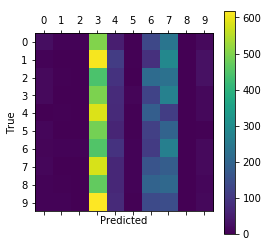

In [18]:
%matplotlib inline

from modules.predict_functions import print_test_accuracy

# calculate the predicted class for the test-set
print_test_accuracy(tf_session=session,
                    x_ph=x,
                    y_true_ph=y_true,
                    keep_prob_ph=keep_prob,
                    y_pred_cls_tensor=y_pred_cls,
                    show_confusion_matrix=True)

#### performace after 1 optimization  iteration

In [19]:
from modules.predict_functions import optimize

#def main():
#    for lr in [1e-2, 1e-3, 1e-4]:
#        for bs in [64, 128]:
#            logging.info('learing rate = {:.0E}, batch size = {}'.format(lr, bs))
#cifar10_model(lr, bs)

# get the save path returned by saver.save() in optimization() methode
save_path = optimize(tf_session=session,
                 tf_saver=saver,
                 tensorboard_summary=merged_summary,
                 tensorboard_writer=writer,    
                 model_path=model_path,
                 x_ph=x,
                 y_true_ph=y_true,
                 keep_prob_ph=keep_prob,
                 y_pred_cls_tensor=y_pred_cls,
                 optimizer=optimizer, 
                 display_step = display_step,
                 num_iterations=1, 
                 loss_opt = cost,
                 accuracy = accuracy,
                 dropout_prob=dropout_prob_1)
    

predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-1
Optimization Iteration:      1, Minibatch Loss:2.2643, Training-Batch Accuracy:  20.3%, Validation Accuracy: 12.6% *
Time usage:0:00:00


predicted classes for test-set:
Accuracy on Test-set:12.5% (1248 / 10000)
Example errors for test-set:
    predicted classes:	 [0 8 3 ... 0 4 8]
    correct:		 [False False False ... False False False]
    incorrect:		 [ True  True  True ...  True  True  True]
------------------------------------------------------------------------------------


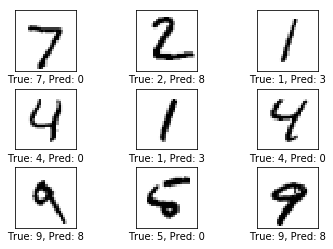

------------------------------------------------------------------------------------
Confusion Matrix for test-set :
Confusion Matrix:
 [[652   0   0   9  98   0   0   7 163  51]
 [409   0   1  16 347   0   0  13 242 107]
 [497   0   2   6 194   0   0   9 207 117]
 [555   0   0  13 218   0   0  12 144  68]
 [411   0   0  19 250   0   0  11 173 118]
 [519   0   0  12 159   0   0   7 149  46]
 [436   0   5   6 202   0   0  10 222  77]
 [493   0   0  15 225   0   0  15 161 119]
 [397   0   1  13 269   0   0  13 180 101]
 [386   0   0  18 264   0   0  10 195 136]]
------------------------------------------------------------------------------------


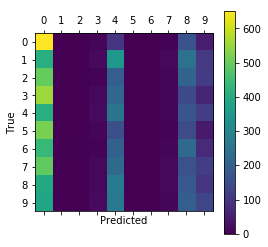

In [20]:
from modules.predict_functions import print_test_accuracy

print_test_accuracy(tf_session=session,
                    x_ph=x,
                    y_true_ph=y_true,
                    keep_prob_ph=keep_prob,
                    y_pred_cls_tensor=y_pred_cls,
                    show_example_error=True,
                    show_confusion_matrix=True)

#### performace after 100 optimization  iteration

In [21]:
optimize(tf_session=session,
         tf_saver=saver,
         tensorboard_summary=merged_summary,
         tensorboard_writer=writer,
         model_path=model_path,
         x_ph=x,
         y_true_ph=y_true,
         keep_prob_ph=keep_prob,
         y_pred_cls_tensor=y_pred_cls,
         optimizer=optimizer, 
         display_step = display_step,
         num_iterations=99, 
         loss_opt = cost,
         accuracy = accuracy,
         dropout_prob=dropout_prob_1)

predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-21
Optimization Iteration:     21, Minibatch Loss:1.8015, Training-Batch Accuracy:  43.8%, Validation Accuracy: 52.9% *
predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-41
Optimization Iteration:     41, Minibatch Loss:0.9411, Training-Batch Accuracy:  68.8%, Validation Accuracy: 77.6% *
predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-61
Optimization Iteration:     61, Minibatch Loss:0.5225, Training-Batch Accuracy:  87.5%, Validation Accuracy: 87.0% *
predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-81
Optimization Iteration:     81, Minibatch Loss:0.3290, Training-Batch Accuracy:  87.5%, Validation Accuracy: 89.5% *
Time usage:0:00:02


'checkpoints/model.ckpt-81'

predicted classes for test-set:
Accuracy on Test-set:89.6% (8958 / 10000)
Confusion Matrix for test-set :
Confusion Matrix:
 [[ 961    0    2    1    0    1    8    3    2    2]
 [   0 1111    7    1    0    0    3    0   13    0]
 [  20    5  929    6   12    0    5   25   24    6]
 [   6    5   41  857    0   26    2   17   26   30]
 [   3   11    5    0  860    0   13    2    8   80]
 [  20    6    7   33    0  757   11    2   36   20]
 [  26    7   14    0   23   13  863    2   10    0]
 [   2   23   19    2    3    0    0  882    4   93]
 [  19   19   18   12    8   20    7   10  804   57]
 [   8   10    1    6   13    1    0   28    8  934]]
------------------------------------------------------------------------------------


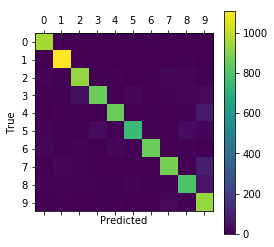

In [22]:
print_test_accuracy(tf_session=session,
                    x_ph=x,
                    y_true_ph=y_true,
                    keep_prob_ph=keep_prob,
                    y_pred_cls_tensor=y_pred_cls,
                    show_confusion_matrix=True)

#### performace after 1000 optimization  iteration

In [23]:
optimize(tf_session=session,
         tf_saver=saver,
         tensorboard_summary=merged_summary,
         tensorboard_writer=writer,
         model_path=model_path,
         x_ph=x,
         y_true_ph=y_true,
         keep_prob_ph=keep_prob,
         y_pred_cls_tensor=y_pred_cls,
         optimizer=optimizer, 
         display_step = display_step,
         num_iterations=900, 
         loss_opt = cost,
         accuracy = accuracy,
         dropout_prob=dropout_prob_1)

predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-101
Optimization Iteration:    101, Minibatch Loss:0.3505, Training-Batch Accuracy:  90.6%, Validation Accuracy: 91.9% *
predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-121
Optimization Iteration:    121, Minibatch Loss:0.2209, Training-Batch Accuracy:  92.2%, Validation Accuracy: 93.2% *
predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-141
Optimization Iteration:    141, Minibatch Loss:0.1396, Training-Batch Accuracy:  96.9%, Validation Accuracy: 94.1% *
predicted classes for validation-set:
Optimization Iteration:    161, Minibatch Loss:0.3624, Training-Batch Accuracy:  93.8%, Validation Accuracy: 93.6% 
predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-181
Optimizatio

predicted classes for validation-set:
Optimization Iteration:    941, Minibatch Loss:0.2493, Training-Batch Accuracy:  95.3%, Validation Accuracy: 98.1% 
predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-961
Optimization Iteration:    961, Minibatch Loss:0.0480, Training-Batch Accuracy:  98.4%, Validation Accuracy: 98.5% *
predicted classes for validation-set:
Optimization Iteration:    981, Minibatch Loss:0.0358, Training-Batch Accuracy: 100.0%, Validation Accuracy: 97.8% 
Time usage:0:00:14


'checkpoints/model.ckpt-961'

predicted classes for test-set:
Accuracy on Test-set:97.4% (9740 / 10000)
Confusion Matrix for test-set :
Confusion Matrix:
 [[ 970    0    2    0    0    0    2    1    3    2]
 [   0 1110    6    1    0    0    6    1   11    0]
 [   2    1  992   13    2    0    0    3   19    0]
 [   1    0    0  981    0   18    0    1    7    2]
 [   1    2    2    0  950    0    4    2    3   18]
 [   2    0    0    2    0  877    4    0    6    1]
 [   8    2    0    0    3    1  941    0    3    0]
 [   1    5   13    5    2    0    0  981    2   19]
 [   3    1    0    3    2    2    0    2  954    7]
 [   3    3    0    3    2    5    1    3    5  984]]
------------------------------------------------------------------------------------


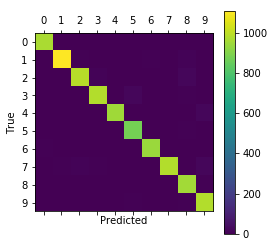

In [24]:
print_test_accuracy(tf_session=session,
                    x_ph=x,
                    y_true_ph=y_true,
                    keep_prob_ph=keep_prob,
                    y_pred_cls_tensor=y_pred_cls,
                    show_confusion_matrix=True)

#### performace after 10000 optimization  iteration

In [25]:
optimize(tf_session=session,
         tf_saver=saver,
         tensorboard_summary=merged_summary,
         tensorboard_writer=writer,
         model_path=model_path,
         x_ph=x,
         y_true_ph=y_true,
         keep_prob_ph=keep_prob,
         y_pred_cls_tensor=y_pred_cls,
         optimizer=optimizer, 
         display_step = display_step,
         num_iterations=9000, 
         loss_opt = cost,
         accuracy = accuracy,
         dropout_prob=dropout_prob_1)

predicted classes for validation-set:
Optimization Iteration:   1001, Minibatch Loss:0.0137, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.1% 
predicted classes for validation-set:
Optimization Iteration:   1021, Minibatch Loss:0.0845, Training-Batch Accuracy:  96.9%, Validation Accuracy: 97.8% 
predicted classes for validation-set:
Optimization Iteration:   1041, Minibatch Loss:0.1184, Training-Batch Accuracy:  93.8%, Validation Accuracy: 98.2% 
predicted classes for validation-set:
Optimization Iteration:   1061, Minibatch Loss:0.0381, Training-Batch Accuracy:  98.4%, Validation Accuracy: 98.2% 
predicted classes for validation-set:
Optimization Iteration:   1081, Minibatch Loss:0.0687, Training-Batch Accuracy:  98.4%, Validation Accuracy: 98.2% 
predicted classes for validation-set:
Optimization Iteration:   1101, Minibatch Loss:0.0690, Training-Batch Accuracy:  96.9%, Validation Accuracy: 98.2% 
predicted classes for validation-set:
Optimization Iteration:   1121, Miniba

predicted classes for validation-set:
Optimization Iteration:   2001, Minibatch Loss:0.0161, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.8% 
predicted classes for validation-set:
Optimization Iteration:   2021, Minibatch Loss:0.0372, Training-Batch Accuracy:  96.9%, Validation Accuracy: 98.7% 
predicted classes for validation-set:
Optimization Iteration:   2041, Minibatch Loss:0.0120, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.8% 
predicted classes for validation-set:
Optimization Iteration:   2061, Minibatch Loss:0.0863, Training-Batch Accuracy:  98.4%, Validation Accuracy: 98.8% 
predicted classes for validation-set:
Optimization Iteration:   2081, Minibatch Loss:0.0389, Training-Batch Accuracy:  98.4%, Validation Accuracy: 98.7% 
predicted classes for validation-set:
Optimization Iteration:   2101, Minibatch Loss:0.0212, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.6% 
predicted classes for validation-set:
Optimization Iteration:   2121, Miniba

predicted classes for validation-set:
Optimization Iteration:   3021, Minibatch Loss:0.0122, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.6% 
predicted classes for validation-set:
Optimization Iteration:   3041, Minibatch Loss:0.0065, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   3061, Minibatch Loss:0.0068, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.8% 
predicted classes for validation-set:
Optimization Iteration:   3081, Minibatch Loss:0.0369, Training-Batch Accuracy:  98.4%, Validation Accuracy: 98.9% 
predicted classes for validation-set:
Optimization Iteration:   3101, Minibatch Loss:0.0114, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.8% 
predicted classes for validation-set:
Optimization Iteration:   3121, Minibatch Loss:0.0148, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.8% 
predicted classes for validation-set:
Optimization Iteration:   3141, Miniba

predicted classes for validation-set:
Optimization Iteration:   4081, Minibatch Loss:0.0061, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   4101, Minibatch Loss:0.0168, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.8% 
predicted classes for validation-set:
Optimization Iteration:   4121, Minibatch Loss:0.0395, Training-Batch Accuracy:  98.4%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   4141, Minibatch Loss:0.0019, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   4161, Minibatch Loss:0.0083, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   4181, Minibatch Loss:0.0089, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   4201, Miniba

predicted classes for validation-set:
Optimization Iteration:   5141, Minibatch Loss:0.0173, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.9% 
predicted classes for validation-set:
Optimization Iteration:   5161, Minibatch Loss:0.0082, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
Optimization Iteration:   5181, Minibatch Loss:0.0055, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.9% 
predicted classes for validation-set:
Optimization Iteration:   5201, Minibatch Loss:0.0221, Training-Batch Accuracy:  98.4%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
Optimization Iteration:   5221, Minibatch Loss:0.0100, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
Optimization Iteration:   5241, Minibatch Loss:0.0278, Training-Batch Accuracy:  98.4%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   5261, Miniba

predicted classes for validation-set:
Optimization Iteration:   6221, Minibatch Loss:0.0011, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   6241, Minibatch Loss:0.0060, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   6261, Minibatch Loss:0.0030, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.9% 
predicted classes for validation-set:
Optimization Iteration:   6281, Minibatch Loss:0.0023, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   6301, Minibatch Loss:0.0013, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
Optimization Iteration:   6321, Minibatch Loss:0.0463, Training-Batch Accuracy:  98.4%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   6341, Miniba

predicted classes for validation-set:
Optimization Iteration:   7281, Minibatch Loss:0.0075, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   7301, Minibatch Loss:0.0027, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   7321, Minibatch Loss:0.0020, Training-Batch Accuracy: 100.0%, Validation Accuracy: 98.9% 
predicted classes for validation-set:
Optimization Iteration:   7341, Minibatch Loss:0.0017, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   7361, Minibatch Loss:0.0418, Training-Batch Accuracy:  98.4%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   7381, Minibatch Loss:0.0033, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
Optimization Iteration:   7401, Miniba

predicted classes for validation-set:
Optimization Iteration:   8361, Minibatch Loss:0.0042, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   8381, Minibatch Loss:0.0020, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   8401, Minibatch Loss:0.0078, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.0% 
predicted classes for validation-set:
Optimization Iteration:   8421, Minibatch Loss:0.0283, Training-Batch Accuracy:  98.4%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   8441, Minibatch Loss:0.0043, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
model_path: checkpoints/model.ckpt
Model saved in file: checkpoints/model.ckpt-8461
Optimization Iteration:   8461, Minibatch Loss:0.0070, Training-Batch Accuracy: 100.0%, Validation Accuracy:

predicted classes for validation-set:
Optimization Iteration:   9421, Minibatch Loss:0.0025, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
Optimization Iteration:   9441, Minibatch Loss:0.0012, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   9461, Minibatch Loss:0.0005, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
Optimization Iteration:   9481, Minibatch Loss:0.0476, Training-Batch Accuracy:  98.4%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   9501, Minibatch Loss:0.0070, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.1% 
predicted classes for validation-set:
Optimization Iteration:   9521, Minibatch Loss:0.0025, Training-Batch Accuracy: 100.0%, Validation Accuracy: 99.2% 
predicted classes for validation-set:
Optimization Iteration:   9541, Miniba

'checkpoints/model.ckpt-8461'

predicted classes for test-set:
Accuracy on Test-set:99.1% (9912 / 10000)
Confusion Matrix for test-set :
Confusion Matrix:
 [[ 976    0    0    0    0    0    1    0    2    1]
 [   0 1128    0    0    0    0    1    1    5    0]
 [   2    0 1020    1    1    0    0    6    2    0]
 [   0    1    0 1001    0    5    0    0    3    0]
 [   0    0    1    0  975    0    2    0    0    4]
 [   2    0    0    3    0  882    1    1    2    1]
 [   2    2    0    0    0    3  946    0    4    1]
 [   0    1    3    2    0    0    0 1017    1    4]
 [   1    0    0    2    0    2    0    0  968    1]
 [   1    0    0    0    4    3    0    2    0  999]]
------------------------------------------------------------------------------------


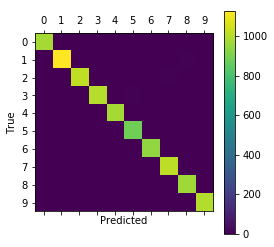

In [26]:
print_test_accuracy(tf_session=session,
                    x_ph=x,
                    y_true_ph=y_true,
                    keep_prob_ph=keep_prob,
                    y_pred_cls_tensor=y_pred_cls,
                    show_confusion_matrix=True)

#### Saver

In [25]:
# reinitialize all the Variables of NN with random values
init_variables()

predicted classes for test-set:
Accuracy on Test-set:11.4% (1137 / 10000)
Confusion Matrix for test-set :
Confusion Matrix:
 [[  2  28   1   0   8   1 194   5   3 738]
 [  3 163   0   0   0   3 299   3   3 661]
 [  0  48   0   1   3   3 148   4   5 820]
 [  1  59   0   0   1   8 238   4   5 694]
 [  1  35   0   0   1  14 173   2   0 756]
 [  2  44   0   0   2  10 254   2   2 576]
 [  1  77   0   0   1   4 193   0   3 679]
 [  7  32   0   1   2   7 288   2   2 687]
 [  5  57   0   0   0  11 213   0   3 685]
 [  3  40   0   0   0  11 191   0   1 763]]
------------------------------------------------------------------------------------


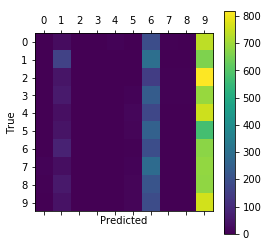

In [26]:
print_test_accuracy(tf_session=session,
                    x_ph=x,
                    y_true_ph=y_true,
                    keep_prob_ph=keep_prob,
                    y_pred_cls_tensor=y_pred_cls,
                    show_confusion_matrix=True)

In [27]:
# reload all the variables that were saved to file during optimization
# get the latest model which has been saved
model_file = tf.train.latest_checkpoint('checkpoints/')
saver.restore(sess=session, save_path=model_file)
print("Model restored from file: %s" %model_file)

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt-961
Model restored from file: checkpoints/model.ckpt-961


predicted classes for test-set:
Accuracy on Test-set:98.1% (9807 / 10000)
Confusion Matrix for test-set :
Confusion Matrix:
 [[ 962    0    2    0    0    1    8    1    3    3]
 [   0 1127    2    1    1    1    0    1    2    0]
 [   4    2 1012    3    0    0    0    2    9    0]
 [   0    0    0 1002    0    1    0    4    3    0]
 [   0    1    3    1  967    0    1    0    2    7]
 [   2    0    2   16    0  863    2    2    3    2]
 [   5    2    0    1    5    2  941    0    2    0]
 [   0    3   14    3    0    1    0 1004    1    2]
 [   3    1    5    1    4    2    2    1  951    4]
 [   1    5    1    5    9    2    0    6    2  978]]
------------------------------------------------------------------------------------


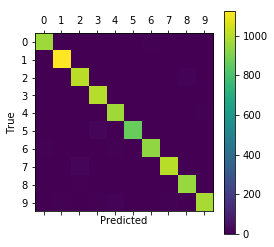

In [28]:
print_test_accuracy(tf_session=session,
                    x_ph=x,
                    y_true_ph=y_true,
                    keep_prob_ph=keep_prob,
                    y_pred_cls_tensor=y_pred_cls,
                    show_confusion_matrix=True)

In [29]:
# close the session
# session.close()

visualizing the TF graph

In [30]:
# writer = tf.summary.FileWriter("tmp/simple_cnn/3")
# writer.add_graph(session.graph)

# in you commande line console, just write it down
# tensorboard --logdir ./tmp/simple_cnn/2

feature visualisation

In [25]:
from modules.feature_visualization import get_conv_layer_names

conv_names = get_conv_layer_names()
print("conv_names:", conv_names)
print("number of convolution layer:", len(conv_names))

conv_names: ['layer_conv_1/conv2d', 'layer_conv_2/conv2d']
number of convolution layer: 2


Layer: layer_conv_1/conv2d
Optimizing image for feature No. 0
Optimizing image for feature No. 1
Optimizing image for feature No. 2
Optimizing image for feature No. 3
Optimizing image for feature No. 4
Optimizing image for feature No. 5
Optimizing image for feature No. 6
Optimizing image for feature No. 7
Optimizing image for feature No. 8
Optimizing image for feature No. 9


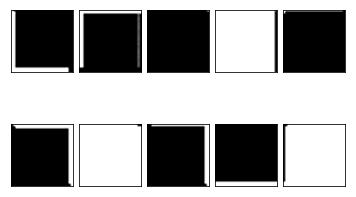

In [34]:
from modules.feature_visualization import optimize_images

optimize_images(tf_session=session,
                x_image = x_image,
                y_pred = y_pred,
                logits = output_layer,
                conv_names=conv_names,
                conv_id=0)

Layer: layer_conv_2/conv2d
Optimizing image for feature No. 0
Optimizing image for feature No. 1
Optimizing image for feature No. 2
Optimizing image for feature No. 3
Optimizing image for feature No. 4
Optimizing image for feature No. 5
Optimizing image for feature No. 6
Optimizing image for feature No. 7
Optimizing image for feature No. 8
Optimizing image for feature No. 9


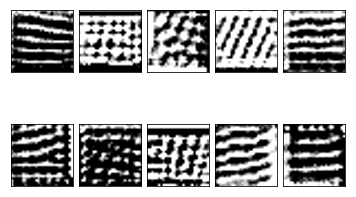

In [36]:
optimize_images(tf_session=session,
                x_image = x_image,
                y_pred = y_pred,
                logits = output_layer,
                conv_names=conv_names,
                conv_id=1)

In [47]:
from modules.feature_visualization import optimize_image
image = optimize_image(tf_session=session, x_image=x_image, y_pred=y_pred,
                       logits=output_layer, conv_names=conv_names,
                       conv_id=None, feature=1,
                       num_iterations=10, show_progress=True)

Iteration: 0
Predicted class: 8, score:  40.46%
Gradient min: -0.150881, max:  0.222210, step_size:    16.76
Loss: -0.20583619

Iteration: 1
Predicted class: 8, score:  69.88%
Gradient min: -0.377900, max:  0.413841, step_size:     8.16
Loss: 6.0644083

Iteration: 2
Predicted class: 1, score:  86.23%
Gradient min: -0.441944, max:  0.519559, step_size:     7.19
Loss: 9.916372

Iteration: 3
Predicted class: 1, score:  99.30%
Gradient min: -0.400056, max:  0.506750, step_size:     8.75
Loss: 13.032351

Iteration: 4
Predicted class: 1, score: 100.00%
Gradient min: -0.504603, max:  0.713611, step_size:     6.71
Loss: 21.19303

Iteration: 5
Predicted class: 1, score: 100.00%
Gradient min: -0.551424, max:  0.382091, step_size:     8.37
Loss: 16.31617

Iteration: 6
Predicted class: 1, score: 100.00%
Gradient min: -0.514218, max:  0.655588, step_size:     7.01
Loss: 20.12964

Iteration: 7
Predicted class: 1, score: 100.00%
Gradient min: -0.574430, max:  0.577745, step_size:     6.55
Loss: 20.28

Note how the predicted class indeed becomes 2 already within the first few iterations so the optimization is working as intended. Also note how the loss-measure is increasing rapidly until it appartently converges. This is because the loss-measure is actually just the value of the feature or neuron that we are trying to maximize. Because this is the logits-layer prior to the softmax, these value canbe infinitively high, but they are limited because we limit the image-value between 0 and 1.
* now plot the image that was found. this the image that the CNN believes look  most like digit 2.

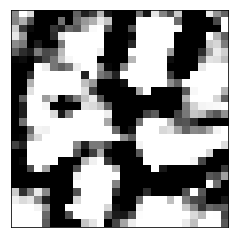

In [48]:
from modules.plot_functions import plot_image
plot_image(image)

Although some of the curves do hint somewhat at the digit 2, it is hard for a human to see why the CNN believes this is the optimal image for digit 2.  

Final FC layer before softmax.
Optimizing image for feature No. 0
Optimizing image for feature No. 1
Optimizing image for feature No. 2
Optimizing image for feature No. 3
Optimizing image for feature No. 4
Optimizing image for feature No. 5
Optimizing image for feature No. 6
Optimizing image for feature No. 7
Optimizing image for feature No. 8
Optimizing image for feature No. 9


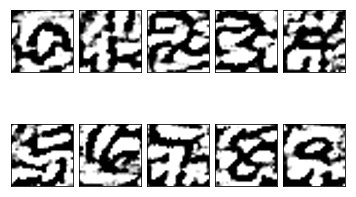

In [43]:
optimize_images(tf_session=session, x_image=x_image, y_pred=y_pred,
                logits=output_layer, conv_names=None, conv_id=None,
                num_iterations=30)

These images may vary each time you run the optimization. Some of the images can be seen to somewhat resemble the hand-written digits. But the other images are often impossible to recognize and it is hard to understand why the CNN thinks these are the optimal input images for those digits.

The reason is perhaps that the CNN tries to recognize all digits simutaneously, and it has found that certain pixels often determine whether the images shows one digits or another. So the CNN has learned to differentiate those pixels that is has found to be important, but not the underlying curves and shapes of the digits, in the same way that a human recognize a the digits.

Another possibility is that the data-set contains mis-classified digits which may confuse the CNN during training. we have previously seen how some of the digits in the data-set are very hard to read even for human, this may cause the CNN to become dustroted and trying to recognize strange artifacts in the images.

Yet another possibility is that the optimization process has stagated in a local optimum. One way to test this, would be to run the optimization 50 times for the digits that are unclear, and see if some of the resulting images become more clear.

In [ ]:
# session.close()